In [9]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.style.use(os.path.join(os.path.abspath('../'), 'plot_style.mplstyle'))

## Emulator mock challenge: Abacus HOD variations compared to diffsky mock

In [10]:
# Read HOD mock measurements
r = 20
variation = 'cosmo+hod'

if variation == 'hod':
    data_dir = Path('/pscratch/sd/m/mpinon/density/training_sets/hod/c000_ph000/seed0/')
elif variation == 'cosmo+hod':
    data_dir = Path('/pscratch/sd/m/mpinon/density/training_sets/cosmo+hod/ph000/seed0')
data_fn = Path(data_dir) / 'pdf_r{:.0f}_lhc_cut.npy'.format(r)
lhc_pdf = np.load(data_fn, allow_pickle=True,).item()
data_fn = Path(data_dir) / 'cgf_r{:.0f}_lhc_logbins_cut.npy'.format(r)
lhc_cgf = np.load(data_fn, allow_pickle=True,).item()

delta = lhc_pdf['delta']
pdf = lhc_pdf['lhc_y']
lda = lhc_cgf['lambda']
cgf = lhc_cgf['lhc_y']

### Covariance

In [11]:
# rescale cov to the volume of the diffsky mock
prefactor = 1 / 8

# Read small boxes measurements for covariance
data_dir = Path('/pscratch/sd/m/mpinon/density/cov/')
data_fn = Path(data_dir) / 'pdf_r{:.0f}_cov_lhc_cut.npy'.format(r)
lhc_cov_pdf = np.load(data_fn, allow_pickle=True,).item()
delta_cov = lhc_cov_pdf['delta']
cov_pdf = prefactor * np.cov(lhc_cov_pdf['lhc_y'], rowvar=False)
mean_pdf = np.mean(lhc_cov_pdf['lhc_y'], axis=0)
std_pdf = np.diag(cov_pdf)**0.5

data_fn = Path(data_dir) / 'cgf_r{:.0f}_cov_lhc_logbins_cut.npy'.format(r)
lhc_cov_cgf = np.load(data_fn, allow_pickle=True,).item()
lda_cov = lhc_cov_cgf['lambda']
cov_cgf = prefactor * np.cov(lhc_cov_cgf['lhc_y'], rowvar=False)
mean_cgf = np.mean(lhc_cov_cgf['lhc_y'], axis=0)
std_cgf = np.diag(cov_cgf)**0.5

### Diffsky

In [12]:
# Read measurements for diffsky mock
data_dir = Path('/pscratch/sd/m/mpinon/density/diffsky/')
data_fn = Path(data_dir) / 'pdf_r{:.0f}_galsampled_diffsky_mock_67120_fixedAmp_001_mass_conc_v0.3_cut.npy'.format(r)
diffsky_pdf = np.load(data_fn, allow_pickle=True,).item()
delta_diffsky = diffsky_pdf['delta']
diffsky_pdf = diffsky_pdf['pdf']

data_fn = Path(data_dir) / 'cgf_r{:.0f}_galsampled_diffsky_mock_67120_fixedAmp_001_mass_conc_v0.3_logbins_cut.npy'.format(r)
diffsky_cgf = np.load(data_fn, allow_pickle=True,).item()
lambda_diffsky = diffsky_cgf['lambda']
diffsky_cgf = diffsky_cgf['cgf']

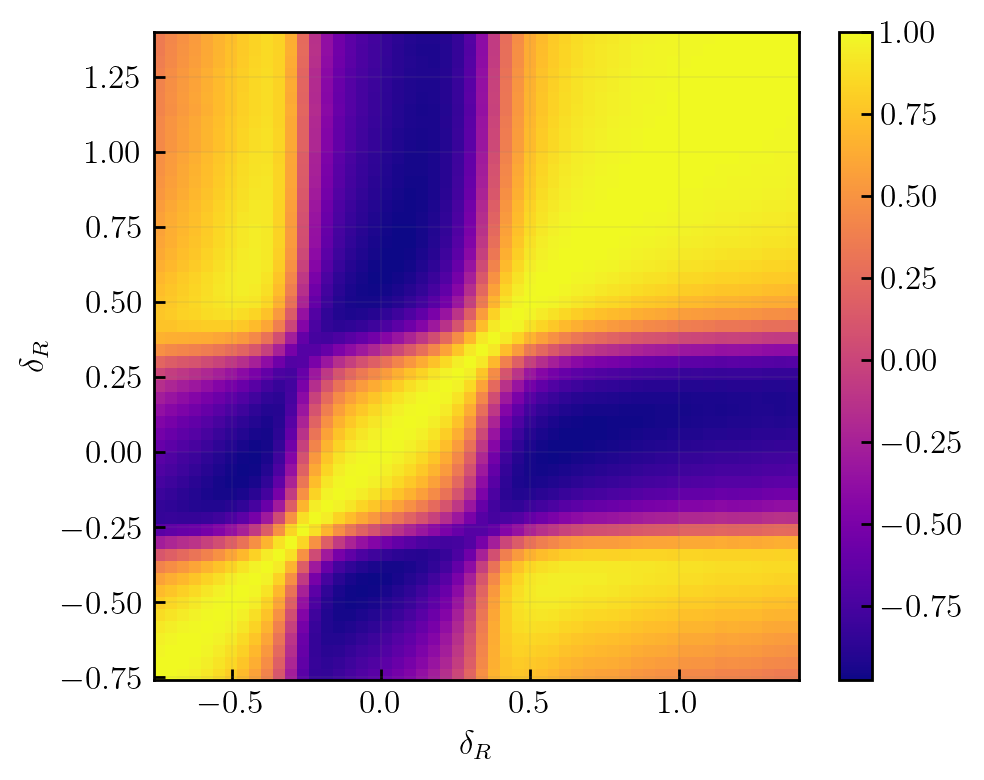

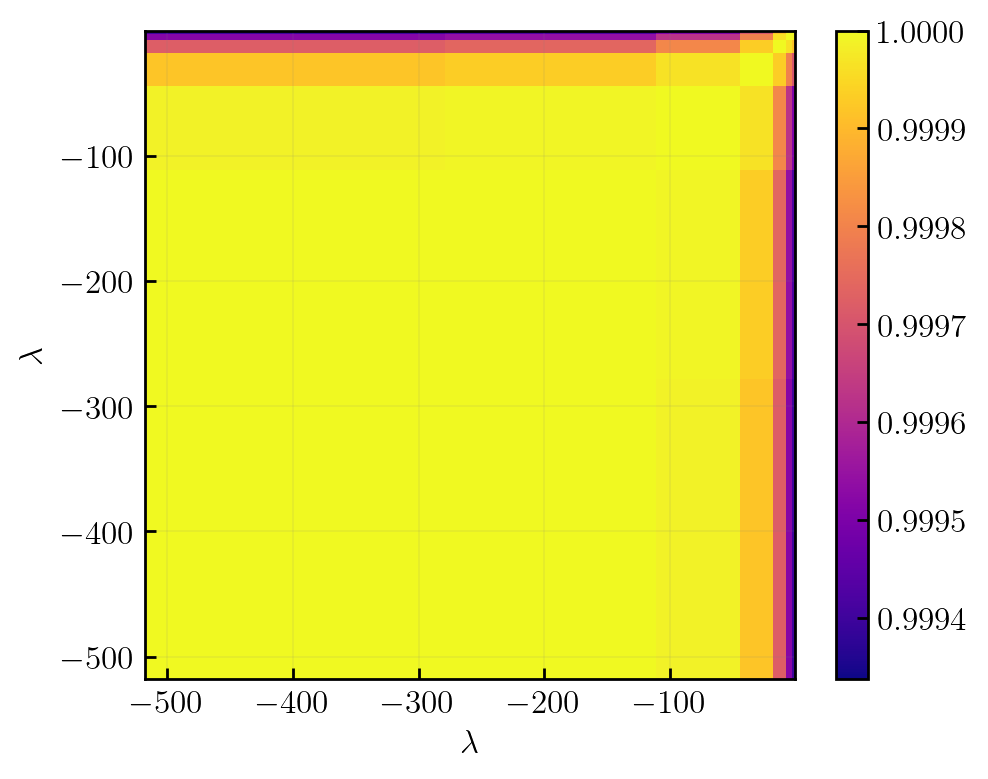

In [13]:
correlation_matrix = np.corrcoef(np.array(cov_pdf))

plt.figure(figsize=(5, 4))
plt.pcolor(delta_cov, delta_cov, correlation_matrix)
plt.xlabel(r'$\delta_R$')
plt.ylabel(r'$\delta_R$')
plt.colorbar()
plt.show()

correlation_matrix = np.corrcoef(np.array(cov_cgf))

plt.figure(figsize=(5, 4))
plt.pcolor(lda_cov, lda_cov, correlation_matrix)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\lambda$')
plt.colorbar()
plt.show()

In [14]:
np.linalg.matrix_rank(cov_cgf)

8

### Plots

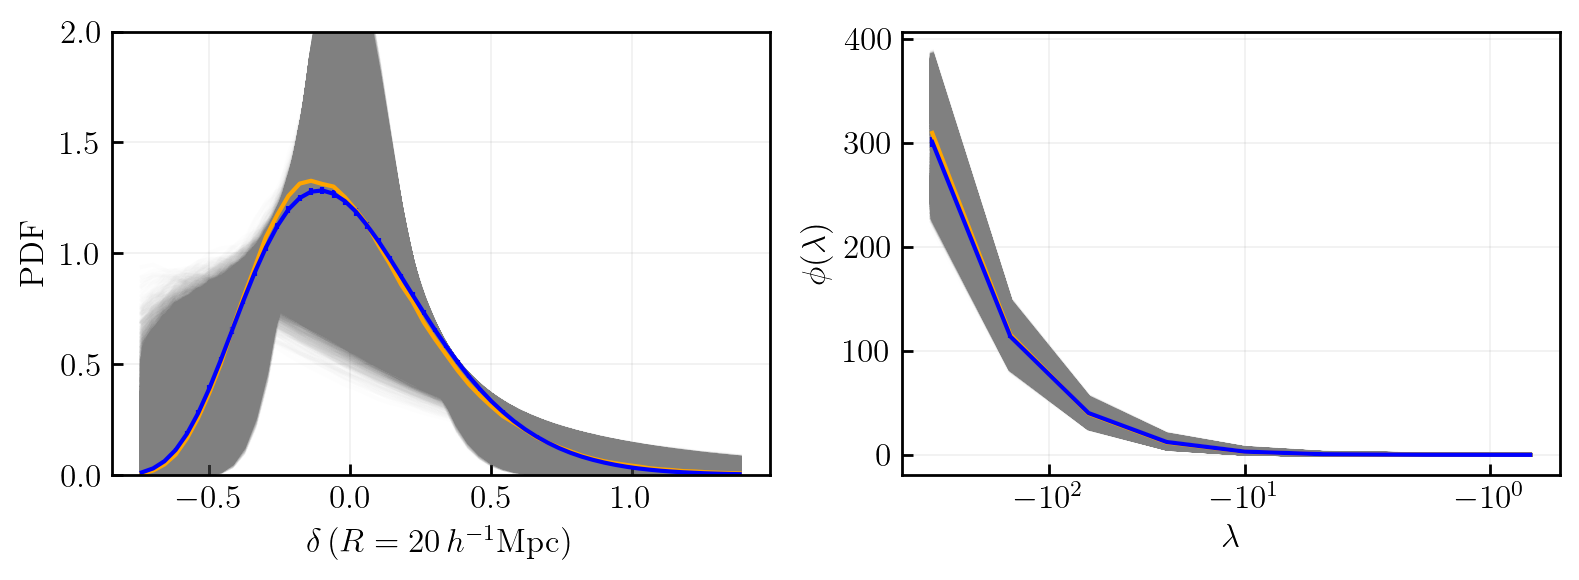

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(delta, pdf.T, color='grey', alpha=0.01)
ax[0].errorbar(delta, mean_pdf, std_pdf, color='blue', label='small boxes')
ax[0].plot(delta_diffsky, diffsky_pdf, color='orange', label='diffsky')

ax[1].plot(lda, cgf.T, color='grey', alpha=0.01)
ax[1].errorbar(lda, mean_cgf, std_cgf, color='blue')
ax[1].plot(lambda_diffsky, diffsky_cgf, color='orange', label='diffsky')

ax[0].plot([], [], color='grey', alpha=0.01, label='Abacus HOD')
ax[0].set_xlabel(r'$\delta \left(R = {:.0f}\, h^{{-1}}{{\rm Mpc}}\right)$'.format(r))
ax[0].set_ylabel('PDF')
ax[0].set_ylim(0, 2)
ax[1].set_xscale('symlog')
ax[1].set_xlabel(r'$\lambda$')
ax[1].set_ylabel(r'$\phi(\lambda)$')
#ax[0].legend(loc='upper right')
plt.tight_layout()
plt.show()